In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats

%matplotlib inline 

In [4]:
df_mlb = pd.read_csv('../data/mlb_salary.csv')
df_nba = pd.read_csv('../data/nba_salary.csv')

In [5]:
df_mlb.head()

,Name,Position,Salary
0,Stephen Strasburg,Starting Pitcher,35000000
1,Zack Greinke,Starting Pitcher,31500000
2,Clayton Kershaw,Starting Pitcher,31000000
3,David Price,Starting Pitcher,31000000
4,Max Scherzer,Starting Pitcher,30262705


In [6]:
df_nba.head()

,Name,Position,Salary
0,Stephen Curry,Point Guard,37457154
1,Chris Paul,Point Guard,35654150
2,Russell Westbrook,Point Guard,35654150
3,LeBron James,Small Forward,35654150
4,Blake Griffin,Power Forward,31873932


### Our hypothesis - Are NBA Salaries equal to MLB Salaries? 

### Let's plot two overlapping histograms to show the distributions - are they normal? 

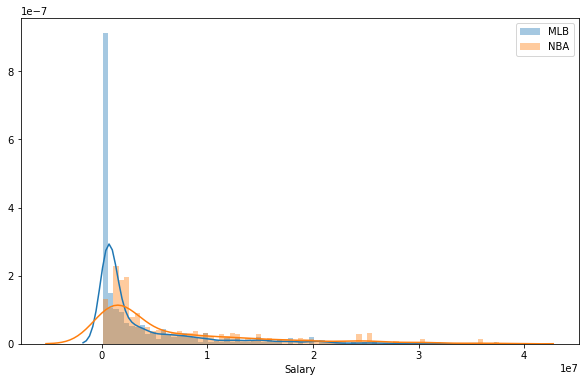

In [7]:
fig , ax = plt.subplots(figsize=(10,6))

sns.distplot(df_mlb['Salary'], ax = ax, bins=np.arange(100_000, 38_000_000, 500000), label='MLB')
sns.distplot(df_nba['Salary'], ax = ax, bins=np.arange(100_000, 38_000_000, 500000), label='NBA')
ax.legend();

### perform a stats.normaltest with the code below - take a look at the documentation
## [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)


- Is this data normal?

In [8]:
## MLB Salaries

stats.normaltest(df_mlb['Salary'])

NormaltestResult(statistic=489.0674259709839, pvalue=6.314773984312256e-107)

In [9]:
### NBA Salaries  
stats.normaltest(df_nba['Salary'])

NormaltestResult(statistic=153.12692335497343, pvalue=5.609331130271854e-34)

### Can we still do a t-test? 

Yes!

In [10]:
one_nba_sample = np.random.choice(df_nba['Salary'], size=80)
one_mlb_sample = np.random.choice(df_mlb['Salary'], size=80)




In [11]:
### MLB Means

one_mlb_sample.mean()

3559072.9375

In [12]:
### NBA Means

one_nba_sample.mean()

6284487.1

#### T test with two independent samples
### [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [19]:
tup=stats.ttest_ind(one_mlb_sample, one_nba_sample)

In [20]:
tup

Ttest_indResult(statistic=-2.750133589967192, pvalue=0.006652260525702498)

In [21]:
t_stat_sm

-2.750133589967192

In [22]:
p_value_sm

0.006652260525702498

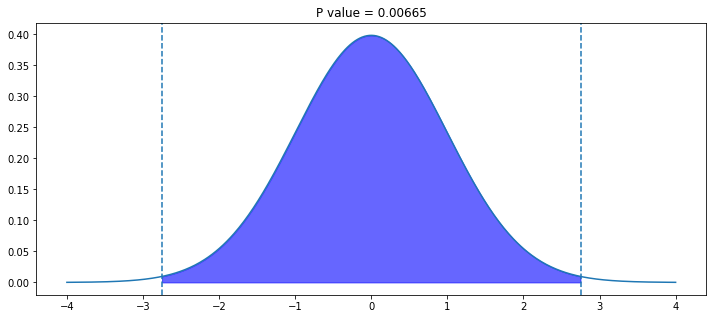

In [23]:
# Set up blank figure and axis 
fig, ax = plt.subplots(figsize=(12,5))

# Generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (81+81-2), 0, 1)

## plot our curve 
ax.plot(xpoints, ypoints);

### filter for area under the curve

filter_ = (- abs(t_stat_sm)  < xpoints) & ( xpoints < abs(t_stat_sm) )

## draw vertical lines at our t_stat 
ax.axvline(abs(t_stat_sm), ls='--')
ax.axvline(- abs(t_stat_sm), ls='--')
ax.fill_between(xpoints, ypoints, where  =filter_ , color = 'blue', alpha =.6)
ax.set_title(f'P value = {round(p_value_sm, 5)}');

# Bonus:

### Central Limit Theorem in Action

In [24]:
def sampler(population, n_trials, sample_size):
    sample_means = []
    for trial in range(n_trials):
        sample = np.random.choice(population, size=sample_size)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
        
    return sample_means

In [25]:
nba_means = sampler(df_nba['Salary'], 2000, 200)
mlb_means = sampler(df_mlb['Salary'], 2000, 200)

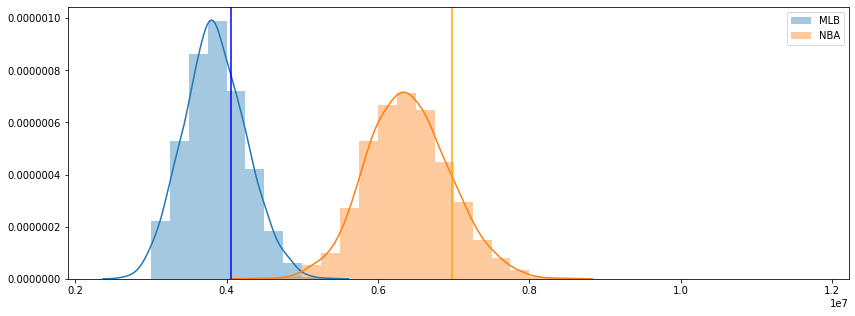

In [27]:
fig , ax1 = plt.subplots(figsize=(14,5))

one_nba_sample = np.random.choice(df_nba['Salary'], size=80)
one_mlb_sample = np.random.choice(df_mlb['Salary'], size=80)

def get_sd(sample):
    sample_mean = sum(sample) / len(sample)
    return (sum([(i - sample_mean)**2 for i in sample])*(1/len(sample))) ** .5 


sns.distplot(mlb_means, ax = ax1, bins=np.arange(3_000_000, 12_000_000, 250_000), label='MLB')
sns.distplot(nba_means, ax = ax1, bins=np.arange(3_000_000, 12_000_000, 250_000), label='NBA')
ax1.axvline(one_mlb_sample.mean(), color = 'b')
ax1.axvline(one_nba_sample.mean(), color = 'orange')

ax1.legend();